In [2]:
import pandas as pd
import os
import csv
import numpy as np
import matplotlib.pyplot as plt
import glob
from pathlib import Path

#create csv path for s and p 500 data
sp_path = "sp_500_stock_data/sp_500_stock_data.csv"
sp_data_1 = pd.read_csv(sp_path)
sp_data = sp_data_1.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9'])
sp_data.tail()

pe_path = "pe_ratio/pe_ratio.csv"
pe_data= pd.read_csv(pe_path)
pe_data.head()


,Date,Ratio,Brand
0,5/9/23,43.96,FORD
1,3/31/23,46.08,FORD
2,12/31/22,0.00,FORD
3,9/30/22,4.68,FORD
4,6/30/22,3.54,FORD


In [3]:

# End price for s and p
sp_500_end_price_1 = sp_data.loc[(sp_data['Date']=='5/9/23')]
sp_500_end_price = sp_500_end_price_1['Price'][1256]
sp_500_end_price

#Beginning price s and p
sp_500_beg_price_1 = sp_data.loc[(sp_data['Date']=='1/2/20')]
sp_500_beg_price = sp_500_beg_price_1['Price'][413]

sp_500_beg_price

3257.85

In [4]:
# Get price at 05/09/2023 for s and p
sp_500_end_price
# Get price at 01/02/2020 for s and p
sp_500_beg_price
#percent change for s and p 500

sp_500_change = (sp_500_end_price-sp_500_beg_price)/ sp_500_beg_price * 100

sp_500_change


26.438295194683615

In [5]:
files = glob.glob('automobile_stock_data/*csv')
frame = []
for file in files:
    frame.append(pd.read_csv(file))
    
combined_df = pd.concat(frame)
combined_df

,Date,Close/Last,Volume,Open,High,Low,Brand
0,5/9/23,$26.97,834411,$26.96,$26.99,$26.81,HONDA
1,5/8/23,$26.79,648801,$26.80,$26.85,$26.70,HONDA
2,5/5/23,$26.75,869658,$26.25,$26.78,$26.15,HONDA
3,5/4/23,$26.03,944702,$26.08,$26.21,$26.02,HONDA
4,5/3/23,$26.19,848427,$26.20,$26.42,$26.12,HONDA
...,...,...,...,...,...,...,...
1253,5/16/18,$36.34,34852,$36.34,$36.50,$36.17,BMW
1254,5/15/18,$36.34,22906,$36.23,$36.51,$36.16,BMW
1255,5/14/18,$36.57,31216,$36.60,$36.69,$36.52,BMW
1256,5/11/18,$36.65,27622,$36.63,$36.82,$36.61,BMW


/var/folders/2l/mxwrd01n6c5dt1svt56qthqm0000gn/T/ipykernel_1104/3009525505.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  honda_df['Close/Last'] = honda_df['Close/Last'].str.replace('$', '').astype(float)
/var/folders/2l/mxwrd01n6c5dt1svt56qthqm0000gn/T/ipykernel_1104/3009525505.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  honda_df['Close/Last'] = honda_df['Close/Last'].str.replace('$', '').astype(float)
/var/folders/2l/mxwrd01n6c5dt1svt56qthqm0000gn/T/ipykernel_1104/3009525505.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

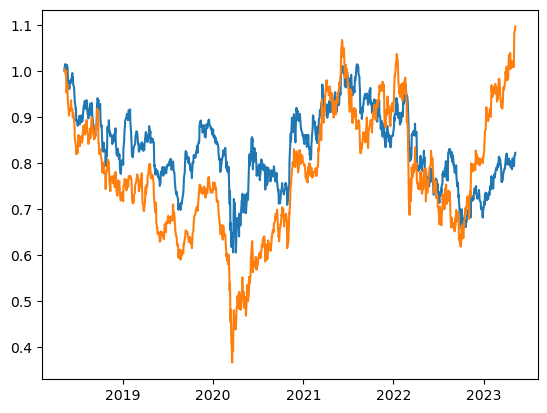

In [6]:
perct_change = combined_df.loc[:, ["Date", "Close/Last", "Brand"]]
perct_change['Date'] =  pd.to_datetime(perct_change['Date'])
format='%d%b%Y:%H:%M:%S.%f'
perct_change = perct_change.sort_values("Date", ascending=True)
perct_change = perct_change.reset_index(drop=True)
perct_change ['percent_change'] = ""
honda_df = perct_change[perct_change['Brand']=='HONDA']
honda_df['Close/Last'] = honda_df['Close/Last'].str.replace('$', '').astype(float)
honda_df['percent_change'] = honda_df['Close/Last'] / honda_df.iloc[0]['Close/Last']
honda_df.head()
bmw_df = perct_change[perct_change['Brand']=='BMW']
bmw_df['Close/Last'] = bmw_df['Close/Last'].str.replace('$', '').astype(float)
bmw_df.head()
bmw_df['percent_change'] = bmw_df['Close/Last'] / bmw_df.iloc[5]['Close/Last']
bmw_df.head(60)
plt.plot(honda_df['Date'], honda_df['percent_change'])
plt.plot(bmw_df['Date'], bmw_df['percent_change'])
plt.show()


In [7]:
# Need to identify Janurary 2 2020 for each stock and then also identify May 8th 2023, then
# add them all up then divide by 6, then compare that to the s and p.

# Get end price (05/09/2023)

bmw_end_price_1 = combined_df.loc[(combined_df['Date']== '5/9/23') & (combined_df['Brand'] == "BMW")]
bmw_end_price=bmw_end_price_1['Close/Last'][0]
bmw_end = float(bmw_end_price.strip('$'))


ford_end_price_1 = combined_df.loc[(combined_df['Date']== '5/9/23') & (combined_df['Brand'] == "FORD")]
ford_end_price=ford_end_price_1['Close/Last'][0]
ford_end = float(ford_end_price.strip('$'))


gm_end_price_1 = combined_df.loc[(combined_df['Date']== '5/9/23') & (combined_df['Brand'] == "GM")]
gm_end_price=gm_end_price_1['Close/Last'][0]
gm_end = float(gm_end_price.strip('$'))


honda_end_price_1 = combined_df.loc[(combined_df['Date']== '5/9/23') & (combined_df['Brand'] == "HONDA")]
honda_end_price=honda_end_price_1['Close/Last'][0]
honda_end = float(honda_end_price.strip('$'))

mercedes_end_price_1 = combined_df.loc[(combined_df['Date']== '5/9/23') & (combined_df['Brand'] == "MERCEDES")]
mercedes_end_price=mercedes_end_price_1['Close/Last'][0]
mercedes_end = float(mercedes_end_price.strip('$'))

toyota_end_price_1 = combined_df.loc[(combined_df['Date']== '5/9/23') & (combined_df['Brand'] == "TOYOTA")]
toyota_end_price=toyota_end_price_1['Close/Last'][0]
toyota_end = float(toyota_end_price.strip('$'))


# Get begininning price (01/02/2020)

bmw_beg_price_1 = combined_df.loc[(combined_df['Date']== '1/2/20') & (combined_df['Brand'] == "BMW")]
bmw_beg_price=bmw_beg_price_1['Open'][843]
bmw_beg = float(bmw_beg_price.strip('$'))

ford_beg_price_1 = combined_df.loc[(combined_df['Date']== '1/2/20') & (combined_df['Brand'] == "FORD")]
ford_beg_price=ford_beg_price_1['Open'][843]
ford_beg = float(ford_beg_price.strip('$'))

gm_beg_price_1 = combined_df.loc[(combined_df['Date']== '1/2/20') & (combined_df['Brand'] == "GM")]
gm_beg_price=gm_beg_price_1['Open'][843]
gm_beg = float(gm_beg_price.strip('$'))

honda_beg_price_1 = combined_df.loc[(combined_df['Date']== '1/2/20') & (combined_df['Brand'] == "HONDA")]
honda_beg_price=honda_beg_price_1['Open'][843]
honda_beg = float(honda_beg_price.strip('$'))

mercedes_beg_price_1 = combined_df.loc[(combined_df['Date']== '1/2/20') & (combined_df['Brand'] == "MERCEDES")]
mercedes_beg_price=mercedes_beg_price_1['Open'][843]
mercedes_beg = float(mercedes_beg_price.strip('$'))


toyota_beg_price_1 = combined_df.loc[(combined_df['Date']== '1/2/20') & (combined_df['Brand'] == "TOYOTA")]
toyota_beg_price=toyota_beg_price_1['Open'][843]
toyota_beg = float(toyota_beg_price.strip('$'))

print("beginning------")
print(bmw_beg, ford_beg, gm_beg, honda_beg, mercedes_beg, toyota_beg)
print('ending------')
print(bmw_end, ford_end, gm_end, honda_end, mercedes_end, toyota_end)

# Make dataframes
df_bmw_change_price = pd.DataFrame({'Brand': ['BMW'], 'Date': ['1/2/20'], 'Open': [bmw_beg], 'Close/Last': [bmw_end]})
df_ford_change_price = pd.DataFrame({'Brand': ['FORD'], 'Date': ['1/2/20'], 'Open': [ford_beg], 'Close/Last': ford_end})
df_gm_change_price = pd.DataFrame({'Brand': ['GM'], 'Date': ['1/2/20'], 'Open': [gm_beg], 'Close/Last': gm_end})
df_honda_change_price = pd.DataFrame({'Brand': ['HONDA'], 'Date': ['1/2/20'], 'Open': [honda_beg], 'Close/Last': honda_end})
df_mercedes_change_price = pd.DataFrame({'Brand': ['MERCEDES'], 'Date': ['1/2/20'], 'Open': [mercedes_beg], 'Close/Last': mercedes_end})
df_toyota_change_price = pd.DataFrame({'Brand': ['TOYOTA'], 'Date': ['1/2/20'], 'Open': [toyota_beg], 'Close/Last': toyota_end})


beginning------
27.68 1.0 37.0 28.6 13.93 142.0
ending------
40.19 1.02 33.28 26.97 18.31 140.85


In [8]:
#Find the amount of Change
bmw_change = (bmw_end-bmw_beg)/ bmw_beg * 100
ford_change = (ford_end-ford_beg)/bmw_beg * 100
gm_change = (gm_end-gm_beg)/gm_beg * 100
honda_change = (honda_end-honda_beg)/honda_beg * 100
mercedes_change = (mercedes_end-mercedes_beg)/mercedes_beg *100
toyota_change = (toyota_end-toyota_beg)/toyota_beg * 100


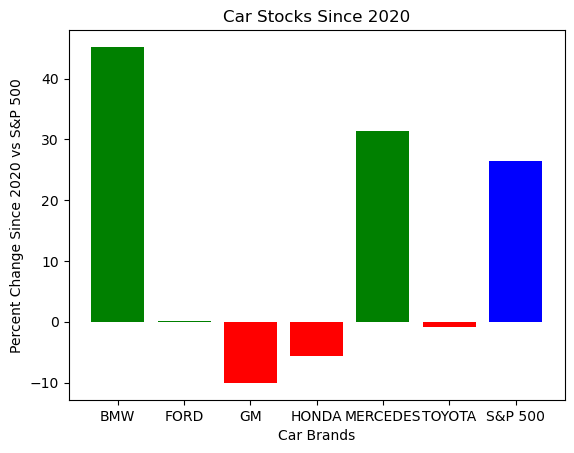

In [9]:

car_brands = ['BMW', 'FORD', 'GM', 'HONDA', 'MERCEDES', 'TOYOTA', 'S&P 500']
percent_change = [bmw_change, ford_change, gm_change, honda_change, mercedes_change, toyota_change, sp_500_change]
colors = ['green', 'green', 'red', 'red', 'green', 'red', 'blue']

plt.bar(car_brands, percent_change, color=colors)
plt.xlabel("Car Brands")
plt.ylabel("Percent Change Since 2020 vs S&P 500")
plt.title("Car Stocks Since 2020")
plt.show()

In [10]:
#Get average increase accross the entire automobile industry

automobile_avg_change = (bmw_change + ford_change + gm_change + honda_change + mercedes_change +toyota_change)/6

automobile_avg_change



10.024509343757364

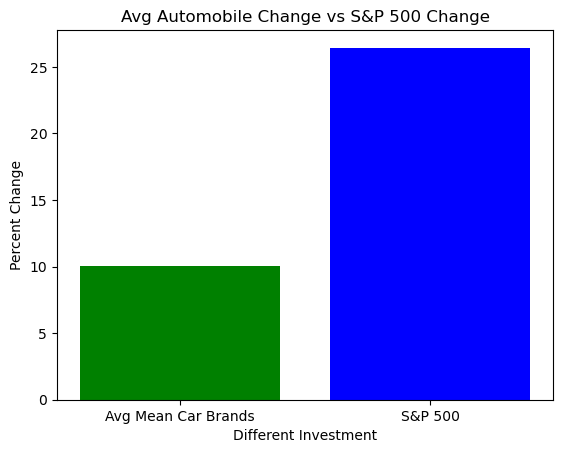

In [11]:
variables = ['Avg Mean Car Brands', 'S&P 500']
perc_change = [automobile_avg_change, sp_500_change]
colors = ['green', 'blue']

plt.bar(variables, perc_change, color=colors)
plt.xlabel("Different Investment")
plt.ylabel("Percent Change")
plt.title("Avg Automobile Change vs S&P 500 Change")
plt.show()

In [12]:

# toyota_beg_price_1 = combined_df.loc[(combined_df['Date']== '1/2/20') & (combined_df['Brand'] == "TOYOTA")]
# ratio = pe_data.loc(pe_data["Brand"]=='FORD')
# ratio

In [37]:
# Finding p/e ratio per company

pe_per_car=pe_data.groupby('Brand').sum()

pe_per_car=cars/15
pe_per_car




/var/folders/2l/mxwrd01n6c5dt1svt56qthqm0000gn/T/ipykernel_1104/2059167310.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pe_per_car=pe_data.groupby('Brand').sum()


,Ratio
Brand,
BMW,8.494133
FORD,37.472667
GM,7.495333
HONDA,9.441333
MERCEDES,7.655333
TOYOTA,9.906667


Text(0.5, 1.0, 'Quarterly P/E Ratio Per Brand')

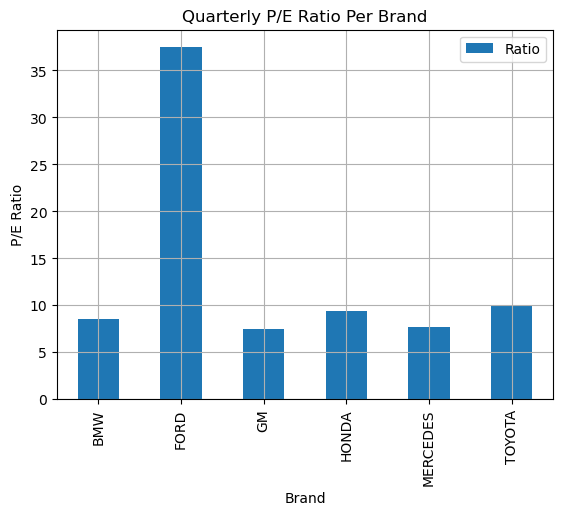

In [38]:
graph_1=pe_per_car.plot(kind='bar', legend=True, grid=True)
graph_1.set_ylabel('P/E Ratio')
graph_1.set_title('Quarterly P/E Ratio Per Brand')

In [22]:
# Get three years of data for trading volume
three_years= combined_df.loc[combined_df['Date'] >= '1/2/20']
three_years

,Date,Close/Last,Volume,Open,High,Low,Brand
0,5/9/23,$26.97,834411,$26.96,$26.99,$26.81,HONDA
1,5/8/23,$26.79,648801,$26.80,$26.85,$26.70,HONDA
2,5/5/23,$26.75,869658,$26.25,$26.78,$26.15,HONDA
3,5/4/23,$26.03,944702,$26.08,$26.21,$26.02,HONDA
4,5/3/23,$26.19,848427,$26.20,$26.42,$26.12,HONDA
...,...,...,...,...,...,...,...
1253,5/16/18,$36.34,34852,$36.34,$36.50,$36.17,BMW
1254,5/15/18,$36.34,22906,$36.23,$36.51,$36.16,BMW
1255,5/14/18,$36.57,31216,$36.60,$36.69,$36.52,BMW
1256,5/11/18,$36.65,27622,$36.63,$36.82,$36.61,BMW


In [24]:
#Get sum of trading data per company (last 3 years)
trading_volume= three_years.groupby('Brand')['Volume'].sum()
trading_volume

Brand
BMW           103282550
FORD          196938642
GM          17742151860
HONDA        1038413567
MERCEDES      306205748
TOYOTA        268869867
Name: Volume, dtype: int64

Text(0.5, 1.0, 'Average Daily Trading Volume Per Brand')

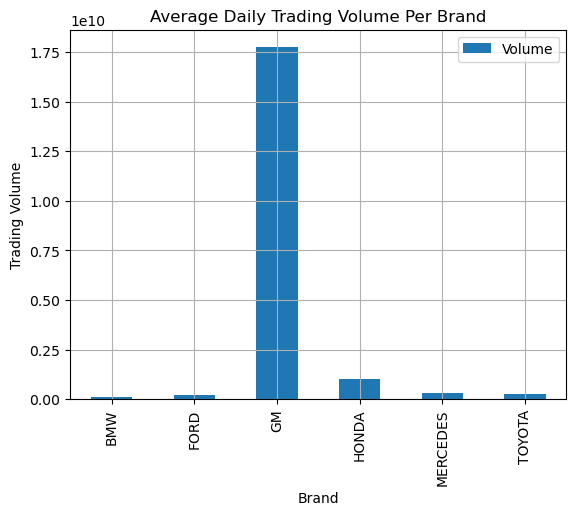

In [36]:
graph = trading_volume.plot(kind='bar', legend=True, grid=True)
graph.set_ylabel('Trading Volume')
graph.set_title('Average Daily Trading Volume Per Brand')